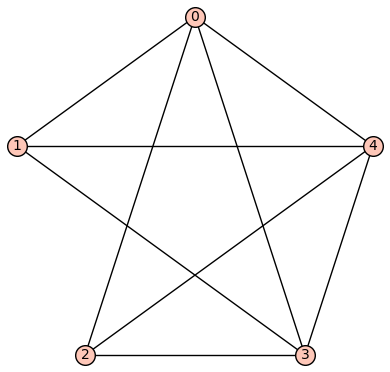

spanning tree:   {(3, 4), (2, 4), (1, 4), (0, 4)}
remaining edges: {(0, 1), (1, 3), (2, 3), (0, 3), (0, 2)}
Generating covers...


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/681 [00:00<?, ?it/s]

  0%|          | 0/14491 [00:00<?, ?it/s]

  0%|          | 0/336465 [00:00<?, ?it/s]

By isomorphism, reduced 336465 covers to 29425
Computing properties...


  0%|          | 0/29425 [00:00<?, ?it/s]

G is 4-correspondence colorable
G is fractionally 4-correspondence packable
G is not 4-correspondence packable


In [5]:
from tqdm.notebook import (tqdm)
#The code below (identitical to part other file, and initially written by Ewan) has run for the following 3 cases.


G=graphs.CompleteGraph(5).copy()
G.delete_edges([(1,2, None)])
G.show()




q = 4
n = G.order()
H = Graph(q*n)

# List of lists
P = list(list(range(q*u, q*u+q)) for u in range(n))

# Place a clique on each list
for Lu in P:
    H.add_clique(Lu)

spanning_tree = set(next(G.spanning_trees()).edges(sort=False, labels=False))
remaining_edges = set(G.edges(sort=False, labels=False)) - spanning_tree

# Place 'parallel' matchings along the spanning tree
for (u, v) in spanning_tree:
    for i in range(q):
        H.add_edge(q*u+i, q*v+i)

print(f'spanning tree:   {spanning_tree}')
print(f'remaining edges: {remaining_edges}')

print('Generating covers...')
covers = {H.canonical_label(P).copy(immutable=True)}

reduce_by_P_iso_each_cover = True
reduce_by_iso_at_end = True

# For each remaining edge uv and all existing covers, put all possible matchings between L(u) and L(v)
for u, v in tqdm(remaining_edges):
    next_covers = set()
    for H in tqdm(covers, leave=False):
        for p in Permutations(range(q)):
            next_H = H.copy(immutable=False)
            for i in range(q):
                next_H.add_edge(q*u+i,q*v+p[i])

            if reduce_by_P_iso_each_cover:
                # store a canonical representative of the isomorphism class of next_H
                # under permutations that fix the lists
                next_covers.add(next_H.canonical_label(P).copy(immutable=True))
            else:
                # store next_H itself
                next_covers.add(next_H.copy(immutable=True))

        # continue iterating
        covers = next_covers

if reduce_by_iso_at_end:
    next_covers = covers

    pre_len = len(next_covers)
    covers_can = set()
    covers = set()
    for H in tqdm(next_covers):
        Hcan = H.canonical_label().copy(immutable=True)
        if Hcan not in covers_can:
            covers_can.add(Hcan)
            covers.add(H.copy(immutable=True))
    print(f'By isomorphism, reduced {pre_len} covers to {len(covers)}')

print('Computing properties...')
max_ir = 0
max_chif = 0
max_chi = 0

H_not_pack = []
H_not_frac = []
H_not_col = []

for H in tqdm(covers):
    chi  = H.chromatic_number()
    chif = q if chi  == q else H.fractional_chromatic_number(check_bipartite=False, check_components=False)
    ir   = q if chif == q else q*n/len(H.independent_set())

    if ir > max_ir:
        max_ir = ir
    if chif > max_chif:
        max_chif = chif
    if chi > max_chi:
        max_chi = chi

    if chi > q:
        H_not_pack.append(H)
    if chif > q:
        H_not_frac.append(H)
    if ir > q:
        H_not_col.append(H)

print(f'G is {"" if max_ir   == q else "not "}{q}-correspondence colorable')
print(f'G is {"" if max_chif == q else "not "}fractionally {q}-correspondence packable')
print(f'G is {"" if max_chi  == q else "not "}{q}-correspondence packable')

In [28]:
print(H_not_pack[0].adjacency_matrix().str())

[0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0]
[1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0]
[1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0]
[1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1]
[0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0]
[1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0]
[0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0]
[0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1]
[1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0]
[0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0]
[0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0]
[0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1]
[0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0]
[1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0]
[0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0]
[0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1]
[0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1]
[1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1]
[0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1]
[0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0]


In [13]:
from sage.graphs.independent_sets import IndependentSets

In [23]:
def goed(i):
    return [i[3]%4,i[0]%4,i[2]%4,i[4]%4,i[1]%4]

In [15]:
Im = IndependentSets(H_not_pack[0], maximal=True)

In [16]:
Lmaxsets=list(Im)

In [17]:
len(Lmaxsets)

90

In [24]:
Lmaximum=[]
for i in Lmaxsets:
    if len(i)==5:
        Lmaximum.append(goed(i))

In [25]:
len(Lmaximum)

54

In [27]:
Lmaximum.sort()
Lmaximum


[[0, 0, 1, 3, 0],
 [0, 0, 1, 3, 2],
 [0, 0, 3, 2, 0],
 [0, 0, 3, 2, 2],
 [0, 0, 3, 2, 3],
 [0, 2, 0, 1, 3],
 [0, 2, 0, 3, 0],
 [0, 2, 1, 1, 3],
 [0, 2, 1, 3, 0],
 [0, 2, 3, 1, 3],
 [0, 3, 0, 1, 2],
 [0, 3, 0, 2, 0],
 [0, 3, 0, 2, 2],
 [0, 3, 1, 1, 2],
 [1, 1, 0, 2, 3],
 [1, 1, 0, 3, 1],
 [1, 1, 2, 2, 3],
 [1, 1, 2, 3, 1],
 [1, 1, 3, 2, 3],
 [1, 2, 0, 3, 0],
 [1, 2, 0, 3, 1],
 [1, 2, 3, 0, 0],
 [1, 2, 3, 0, 1],
 [1, 2, 3, 0, 3],
 [1, 3, 0, 2, 0],
 [1, 3, 2, 0, 0],
 [1, 3, 2, 0, 1],
 [1, 3, 2, 2, 0],
 [2, 0, 1, 0, 3],
 [2, 0, 1, 3, 2],
 [2, 0, 2, 0, 3],
 [2, 0, 2, 3, 2],
 [2, 0, 3, 0, 3],
 [2, 1, 2, 3, 1],
 [2, 1, 2, 3, 2],
 [2, 1, 3, 1, 1],
 [2, 1, 3, 1, 2],
 [2, 1, 3, 1, 3],
 [2, 3, 1, 0, 1],
 [2, 3, 1, 1, 1],
 [2, 3, 1, 1, 2],
 [2, 3, 2, 0, 1],
 [3, 0, 1, 0, 0],
 [3, 0, 2, 0, 0],
 [3, 0, 2, 2, 0],
 [3, 0, 2, 2, 2],
 [3, 1, 0, 1, 1],
 [3, 1, 0, 1, 2],
 [3, 1, 0, 2, 2],
 [3, 1, 2, 2, 2],
 [3, 2, 0, 1, 1],
 [3, 2, 1, 0, 0],
 [3, 2, 1, 0, 1],
 [3, 2, 1, 1, 1]]